# HOMEWORK:

## 1.- Derive Bayes theorem from $p(x,y)=p(y,x)$.

### Tenemos de la regla del producto
### $p(x,y)=p(x|y)p(y)$
### y partiendo de
### $p(x,y)=p(y,x)$
### tenemos entonces 
### $p(x,y)=p(x|y)p(y)=p(y|x)p(x)=p(y,x)$
### y despejando de la expresión anteior tenemos finalmente:
### $p(y|x)=\frac{p(x|y)p(y)}{p(x)}$

## 2.- Las catafixias de chabelo:

### Hay 3 puertas,detrás de una hay un premio. Supongamos que eliges la puerta 2, Chabelo abre la puerta 1 y allí no hay un premio. ¿Te quedas con tu elección original o cambias a la puerta 3?

Si sólo escojo una de las 3 puertas, tendré una probabilidad de escoger una puerta que contenga el premio será igual a $p(ganar)=\frac{1}{3}$, pero si después de haber elegido una puerta y Chabelo abre una de las no escogidas la cuál no contiene el premio y se nos da la opción de escoger entre las dos restantes, uno pensaría que la probabilidad de ganar si cambiamos nuestra elección inicial sería $1/2$ pero en realidad eso no es cierto, el teorema de Bayes nos permite encontrar la verdadera probabilidad. Si definimos de la demostración anterior:

### -$p(y)\rightarrow$ Probabilidad de elegir la puerta que NO contiene el premio antes de cambiar la elección incial.

### -$p(x|y) \rightarrow$ Probabilidad de obtener el premio al cambiar la elección inicial por la opción restante dado que inicialmente había elegido una que NO contenía el premio.

### -$p(x) \rightarrow$ Probabilidad de obtener el premio el premio si se cambia a la opción restante.

### -$p(y|x) \rightarrow$ Probabilidad  de escoger una puerta errónea inicialmente dado que al cambiar de opinión se elige la que SÍ contiene el premio.

donde:
### $p(x)$ es nuestra probabilidad de interés.
### $p(y)=\frac{2}{3}$
### $p(x|y)=1$
### $p(y|x)=1$
### y del teorema de Bayes tenemos entonces que:
### $p(x)=\frac{(1)(\frac{2}{3})}{(1)}= \frac{2}{3}$

### por el resultado anterior vemos que si mantenemos la elección inicial tenemos $1/3$ de probabilidad de ganar el premio, pero si elegimos cambiar nuestra opción inicial una vez que se nos revela una de las puertas sin el premio la probabilidad de elegir la puerta con el premio es $2/3$. 
## Por lo tanto es más conveniente cambiar de elección.

# 3.-MCMC Metropolis Algorithm:

### Implement it in Python and make sure it works for the example of the straight line, but do it in a way it is easy to change data, model, likelihood and prior.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from IPython import display

In [5]:
a=np.load('fit_exercise.npy')
x=a[0]
y=a[1]
y_err=a[2]

In [12]:
#The tranistion model defines how to move from sigma_current to sigma_new
transition_model = lambda x: [x[0],np.random.normal(x[1],0.5,(1,))]

def prior(x):
    #x[0] = mu, x[1]=sigma (new or current)
    #returns 1 for all valid values of sigma. Log(1) =0, so it does not affect the summation.
    #returns 0 for all invalid values of sigma (<=0). Log(0)=-infinity, and Log(negative number) is undefined.
    #It makes the new sigma infinitely unlikely.
    if(x[1] <=0):
        return 0
    return 1

#Computes the likelihood of the data given a sigma (new or current) according to equation (2)
def manual_log_like_normal(x,data):
    #x[0]=mu, x[1]=sigma (new or current)
    #data = the observation
    return np.sum(-np.log(x[1] * np.sqrt(2* np.pi) )-((data-x[0])**2) / (2*x[1]**2))

#Same as manual_log_like_normal(x,data), but using scipy implementation. It's pretty slow.
def log_lik_normal(x,data):
    #x[0]=mu, x[1]=sigma (new or current)
    #data = the observation
    return np.sum(np.log(scipy.stats.norm(x[0],x[1]).pdf(data)))


#Defines whether to accept or reject the new sample
def acceptance(x, x_new):
    if x_new>x:
        return True
    else:
        accept=np.random.uniform(0,1)
        # Since we did a log likelihood, we need to exponentiate in order to compare to the random number
        # less likely x_new are less likely to be accepted
        return (accept < (np.exp(x_new-x)))


def metropolis_hastings(likelihood_computer,prior, transition_model, param_init,iterations,data,acceptance_rule):
    # likelihood_computer(x,data): returns the likelihood that these parameters generated the data
    # transition_model(x): a function that draws a sample from a symmetric distribution and returns it
    # param_init: a starting sample
    # iterations: number of accepted to generated
    # data: the data that we wish to model
    # acceptance_rule(x,x_new): decides whether to accept or reject the new sample
    x = param_init
    accepted = []
    rejected = []   
    for i in range(iterations):
        x_new =  transition_model(x)    
        x_lik = likelihood_computer(x,data)
        x_new_lik = likelihood_computer(x_new,data) 
        if (acceptance_rule(x_lik + np.log(prior(x)),x_new_lik+np.log(prior(x_new)))):            
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)            
                
    return np.array(accepted), np.array(rejected)

In [14]:
mu_obs=a[1].mean()

In [16]:
accepted, rejected = metropolis_hastings(manual_log_like_normal,prior,transition_model,[mu_obs,0.1], 50000,a[1],acceptance)

/Users/valdiviagcr/miniconda3/envs/ambiente1/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log
/Users/valdiviagcr/miniconda3/envs/ambiente1/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
/Users/valdiviagcr/miniconda3/envs/ambiente1/lib/python3.7/site-packages/ipykernel_launcher.py:57: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


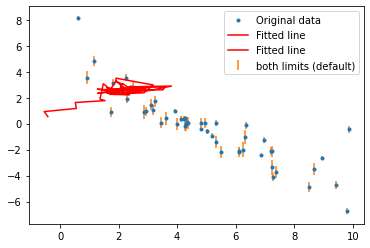

In [19]:
import matplotlib.pyplot as plt
plt.plot(a[0], a[1], 'o', label='Original data', markersize=3)
plt.errorbar(a[0], a[1],yerr= a[2],ls='',label='both limits (default)')
plt.plot(rejected[:50], accepted[:50], 'r', label='Fitted line')
plt.legend()
plt.show()

In [24]:
df=pd.DataFrame(a)

In [26]:
class StraightLineModel(object):
    
    def __init__(self, x, y, y_err):
        """ 
        We store the data as attributes of the object so we don't have to 
        keep passing it in to the methods that compute the probabilities.
        """
        self.x = np.asarray(x)
        self.y = np.asarray(y)
        self.y_err = np.asarray(y_err)

    def ln_likelihood(self, pars):
        """
        We don't need to pass in the data because we can access it from the
        attributes. This is basically the same as the weighted squared 
        deviation function, but includes the constant normalizations for the
        Gaussian likelihood.
        """
        N = len(self.y)
        dy = self.y - line_model(pars, self.x)
        ivar = 1 / self.y_err**2 # inverse-variance
        return -0.5 * (N*np.log(2*np.pi) + np.sum(2*np.log(self.y_err)) + np.sum(dy**2 * ivar))

    def ln_prior(self, pars):
        """ 
        The prior only depends on the parameters, so we don't need to touch
        the data at all. We're going to implement a flat (uniform) prior 
        over the ranges:
            a : [0, 100]
            b : [-50, 50]
        
        """
        
        a, b = pars # unpack parameters
        ln_prior_val = 0. # we'll add to this

        if a < 0 or a > 100.:
            return -np.inf
        else:
            ln_prior_val += np.log(1E-2) # normalization, log(1/100)

        if b < -50 or b > 50.:
            return -np.inf
        else:
            ln_prior_val += np.log(1E-2) # normalization, log(1/100)

        return ln_prior_val

    def ln_posterior(self, pars):
        """ 
        Up to a normalization constant, the log of the posterior pdf is just 
        the sum of the log likelihood plus the log prior.
        """
        lnp = self.ln_prior(pars)
        if np.isinf(lnp): # short-circuit if the prior is infinite (don't bother computing likelihood)
            return lnp

        lnL = self.ln_likelihood(pars)
        lnprob = lnp + lnL

        if np.isnan(lnprob):
            return -np.inf

        return lnprob
    
    def __call__(self, pars):
        return self.ln_posterior(pars)

In [30]:
model = StraightLineModel(x, y, y_err)